**Group Members**

1.Suthasinee Pojam  6220422065

2.Siraprapa Chunloy

3.Teremate Tangpatong

# **Load Dependencies**

In [ ]:
!pip install pycaret

     |████████████████████████████████| 288 kB 5.3 MB/s 
     |████████████████████████████████| 113 kB 35.5 MB/s 
     |████████████████████████████████| 2.0 MB 40.2 MB/s 
     |████████████████████████████████| 1.3 MB 37.4 MB/s 
     |████████████████████████████████| 167 kB 45.5 MB/s 
     |████████████████████████████████| 15.5 MB 32.3 MB/s 
     |████████████████████████████████| 6.8 MB 29.8 MB/s 
     |████████████████████████████████| 86 kB 5.1 MB/s 
     |████████████████████████████████| 1.7 MB 32.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 261 kB 49.2 MB/s 
     |████████████████████████████████| 56 kB 4.8 MB/s 
     |████████████████████████████████| 62 kB 822 kB/s 
     |████████████████████████████████| 675 kB 46.4 MB/s 
     |████████████████████████████████| 3.1 MB 34.0 MB/s 
     |███████████████████

In [ ]:
import pandas as pd
from pycaret.clustering import *

# **Load Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/SupermarketData.csv')

In [ ]:
df.shape

(956574, 22)

In [ ]:
df.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION
0,200732,20071005,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02
1,200733,20071010,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02
2,200741,20071209,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02
3,200731,20070929,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02
4,200737,20071110,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02


In [ ]:
df['SHOP_DATE'] = df['SHOP_DATE'].apply(lambda x: pd.to_datetime(str(x), format='%Y%m%d'))

In [ ]:
df2=df

In [ ]:
df.describe()

,SHOP_WEEK,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,BASKET_ID
count,956574.000000,956574.000000,956574.000000,956574.000000,956574.000000,9.565740e+05
mean,200702.251671,3.996021,14.950665,1.514577,1.871697,9.941059e+14
std,65.857803,1.997058,3.636119,1.621021,2.767820,3.332150e+09
min,200607.000000,1.000000,8.000000,1.000000,0.010000,9.941001e+14
25%,200637.000000,2.000000,12.000000,1.000000,0.750000,9.941031e+14
50%,200713.000000,4.000000,15.000000,1.000000,1.200000,9.941059e+14
75%,200742.000000,6.000000,18.000000,1.000000,2.060000,9.941088e+14
max,200819.000000,7.000000,21.000000,129.000000,476.160000,9.941117e+14


In [ ]:
df.info

<bound method DataFrame.info of         SHOP_WEEK  SHOP_DATE  SHOP_WEEKDAY  SHOP_HOUR  QUANTITY  SPEND  \
0          200732 2007-10-05             6         17         3   6.75   
1          200733 2007-10-10             4         20         3   6.75   
2          200741 2007-12-09             1         11         1   2.25   
3          200731 2007-09-29             7         17         1   2.25   
4          200737 2007-11-10             7         14         3   6.75   
...           ...        ...           ...        ...       ...    ...   
956569     200617 2006-06-22             5         12         3   3.96   
956570     200633 2006-10-13             6         20         3   3.96   
956571     200617 2006-06-22             5         18         3   3.96   
956572     200619 2006-07-06             5         19         3   3.96   
956573     200635 2006-10-23             2         21         3   3.96   

         PROD_CODE PROD_CODE_10 PROD_CODE_20 PROD_CODE_30 PROD_CODE_40  \
0    

# **Prepare customer single view**

# Define features

Total visits = COUNT(DISTINCT BASKET ID)

Ticket size = SUM(SPEND)/COUNT(DISTINCT BASKET ID)

Total no. of SKUs

FirstDate min SHOP_Date

LastDate max SHOP_Date



# Calculate features

In [ ]:
##prepare customer single view
df_csv = df_groupby = df[df['CUST_CODE'].notnull()].groupby(by=['CUST_CODE']).agg(TotalSpend=('SPEND', 'sum'),
                                                                                  TotalVisits=('BASKET_ID', 'nunique'),
                                                                                  TotalSKUs=('PROD_CODE', 'nunique'),
                                                                                  TotalSKUs_10=('PROD_CODE_10', 'nunique'),
                                                                                  TotalSKUs_20=('PROD_CODE_20', 'nunique'),
                                                                                  TotalSKUs_30=('PROD_CODE_30', 'nunique'),
                                                                                  TotalSKUs_40=('PROD_CODE_40', 'nunique'),
                                                                                  FirstDate=('SHOP_DATE', 'min'),
                                                                                  LastDate=('SHOP_DATE', 'max'),

                                                                                  ).reset_index()

In [ ]:
##calculate ticket size
df_csv['TicketSize'] = df_csv['TotalSpend']/df_csv['TotalVisits']

In [ ]:
##find max date in the dataset
max_date = df_csv['LastDate'].max()

In [ ]:
##calculate total days of the relationship
df_csv['total_days'] = (df_csv['LastDate'] - df_csv['FirstDate']).dt.days + 1

In [ ]:
##calculate recency days
df_csv['recency'] = (max_date - df_csv['LastDate']).dt.days

In [ ]:
df_csv.head(5)

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,TotalSKUs_10,TotalSKUs_20,TotalSKUs_30,TotalSKUs_40,FirstDate,LastDate,TicketSize,total_days,recency
0,CUST0000000181,2.44,1,1,1,1,1,1,2007-01-06,2007-01-06,2.440000,1,547
1,CUST0000000369,959.33,220,189,81,36,15,5,2006-04-16,2008-07-05,4.360591,812,1
2,CUST0000000689,328.57,16,116,73,41,19,5,2007-07-22,2008-06-23,20.535625,338,13
3,CUST0000000998,5.95,3,4,4,4,4,2,2006-05-04,2006-07-07,1.983333,65,730
4,CUST0000001163,39.74,4,24,21,15,10,4,2006-10-22,2008-06-22,9.935000,610,14


In [ ]:
df_csv.shape

(6100, 13)

In [ ]:
df2['attend']=1

In [ ]:
df2.head()

,SHOP_WEEK,SHOP_DATE,SHOP_WEEKDAY,SHOP_HOUR,QUANTITY,SPEND,PROD_CODE,PROD_CODE_10,PROD_CODE_20,PROD_CODE_30,PROD_CODE_40,CUST_CODE,CUST_PRICE_SENSITIVITY,CUST_LIFESTAGE,BASKET_ID,BASKET_SIZE,BASKET_PRICE_SENSITIVITY,BASKET_TYPE,BASKET_DOMINANT_MISSION,STORE_CODE,STORE_FORMAT,STORE_REGION,attend
0,200732,2007-10-05,6,17,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000583261,UM,YF,994107800547472,L,MM,Top Up,Grocery,STORE00001,LS,E02,1
1,200733,2007-10-10,4,20,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000537317,MM,OF,994107900512001,L,MM,Full Shop,Fresh,STORE00001,LS,E02,1
2,200741,2007-12-09,1,11,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000472158,MM,YF,994108700468327,L,MM,Full Shop,Grocery,STORE00001,LS,E02,1
3,200731,2007-09-29,7,17,1,2.25,PRD0900001,CL00072,DEP00021,G00007,D00002,CUST0000099658,LA,OF,994107700237811,L,LA,Full Shop,Mixed,STORE00001,LS,E02,1
4,200737,2007-11-10,7,14,3,6.75,PRD0900001,CL00072,DEP00021,G00007,D00002,NaN,NaN,NaN,994108300002212,L,MM,Full Shop,Fresh,STORE00001,LS,E02,1


In [ ]:
##prepare customer single view
df_csv2 = df2[df2['CUST_CODE'].notnull()].groupby(by=['CUST_CODE','SHOP_WEEK']).agg(TotalAtt=('attend', 'sum')).reset_index()

In [ ]:
df_csv3 = df_csv2[df_csv2['CUST_CODE'].notnull()].groupby(by=['CUST_CODE','SHOP_WEEK']).agg(TotalAttMin=('TotalAtt', 'min'),TotalAttMax=('TotalAtt', 'max'),).reset_index()

In [ ]:
df_csv3.head()


,CUST_CODE,SHOP_WEEK,TotalAttMin,TotalAttMax
0,CUST0000000181,200645,1,1
1,CUST0000000369,200607,4,4
2,CUST0000000369,200608,4,4
3,CUST0000000369,200609,3,3
4,CUST0000000369,200610,12,12


In [ ]:
df_csv_final = pd.concat([df_csv3, df_csv], ignore_index=True)

In [ ]:
df_csv.head()

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,TotalSKUs_10,TotalSKUs_20,TotalSKUs_30,TotalSKUs_40,FirstDate,LastDate,TicketSize,total_days,recency
0,CUST0000000181,2.44,1,1,1,1,1,1,2007-01-06,2007-01-06,2.440000,1,547
1,CUST0000000369,959.33,220,189,81,36,15,5,2006-04-16,2008-07-05,4.360591,812,1
2,CUST0000000689,328.57,16,116,73,41,19,5,2007-07-22,2008-06-23,20.535625,338,13
3,CUST0000000998,5.95,3,4,4,4,4,2,2006-05-04,2006-07-07,1.983333,65,730
4,CUST0000001163,39.74,4,24,21,15,10,4,2006-10-22,2008-06-22,9.935000,610,14


In [ ]:
df_csv.dtypes

CUST_CODE               object
TotalSpend             float64
TotalVisits              int64
TotalSKUs                int64
TotalSKUs_10             int64
TotalSKUs_20             int64
TotalSKUs_30             int64
TotalSKUs_40             int64
FirstDate       datetime64[ns]
LastDate        datetime64[ns]
TicketSize             float64
total_days               int64
recency                  int64
dtype: object

In [ ]:
#df_final=df_csv.join(df_csv3,how='left',on='CUST_CODE',c)



#result = pd.concat([df_csv, df_csv3], axis=1, join="left",on='CUST_CODE')


merged = pd.merge(df_csv,df_csv3, on=['CUST_CODE'])

In [ ]:
df_csv.shape

(6100, 13)

In [ ]:
merged.shape

(78137, 16)

In [ ]:
#df_csv=merged

In [ ]:
df_csv.head()

,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,TotalSKUs_10,TotalSKUs_20,TotalSKUs_30,TotalSKUs_40,FirstDate,LastDate,TicketSize,total_days,recency
0,CUST0000000181,2.44,1,1,1,1,1,1,2007-01-06,2007-01-06,2.440000,1,547
1,CUST0000000369,959.33,220,189,81,36,15,5,2006-04-16,2008-07-05,4.360591,812,1
2,CUST0000000689,328.57,16,116,73,41,19,5,2007-07-22,2008-06-23,20.535625,338,13
3,CUST0000000998,5.95,3,4,4,4,4,2,2006-05-04,2006-07-07,1.983333,65,730
4,CUST0000001163,39.74,4,24,21,15,10,4,2006-10-22,2008-06-22,9.935000,610,14


# **Cluster customers**

In [ ]:
exp_clu = setup(data=df_csv, ignore_features=['CUST_CODE','FirstDate', 'LastDate'], normalize=True)

,Description,Value
0,session_id,3728
1,Original Data,"(6100, 13)"
2,Missing Values,False
3,Numeric Features,9
4,Categorical Features,1
5,Ordinal Features,False
6,High Cardinality Features,False
7,High Cardinality Method,None
8,Transformed Data,"(6100, 18)"
9,CPU Jobs,-1


In [ ]:
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [ ]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Needs Ground Truth,Custom
ID,,,,,,,,,
silhouette,Silhouette,Silhouette,<function silhouette_score at 0x7fa001689d40>,make_scorer(silhouette_score),pred,{},True,False,False
chs,Calinski-Harabasz,Calinski-Harabasz,<function calinski_harabasz_score at 0x7fa0016...,make_scorer(calinski_harabasz_score),pred,{},True,False,False
db,Davies-Bouldin,Davies-Bouldin,<function davies_bouldin_score at 0x7fa00168d0e0>,make_scorer(davies_bouldin_score),pred,{},True,False,False
hs,Homogeneity Score,Homogeneity,<function homogeneity_score at 0x7fa001902dd0>,make_scorer(homogeneity_score),pred,{},True,True,False
ari,Rand Index,Rand Index,<function adjusted_rand_score at 0x7fa001902b90>,make_scorer(adjusted_rand_score),pred,{},True,True,False
cs,Completeness Score,Completeness,<function completeness_score at 0x7fa001902e60>,make_scorer(completeness_score),pred,{},True,True,False


# Compare model performance

In [ ]:
metrics = []
for model in models().index:
    if model in ['meanshift', 'optics']:
        continue
    create_model(model)
    metric_result = pull()
    metric_result['model'] = model
    metrics.append(metric_result)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,-0.0878,290.8768,2.9148,0,0,0


In [ ]:
cluster_metrics = pd.concat(metrics)
cluster_metrics.set_index("model", inplace=True)
cluster_metrics.sort_values(by='Silhouette', ascending=False, inplace=True)
cluster_metrics.style.highlight_max(subset=['Silhouette', 'Calinski-Harabasz'], color = 'green', axis = 0).highlight_min(subset=['Davies-Bouldin'], color = 'green', axis = 0)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
model,,,,,,
sc,0.672900,40.611800,0.247600,0,0,0
birch,0.457400,1768.474900,0.855000,0,0,0
kmeans,0.292500,3714.085100,1.172000,0,0,0
hclust,0.281800,3289.183500,1.256000,0,0,0
ap,0.000000,0.000000,0.000000,0,0,0
dbscan,-0.035400,219.369900,1.584800,0,0,0
kmodes,-0.087800,290.876800,2.914800,0,0,0


# Spectral Clustering Clustering

In [ ]:
sc = create_model('sc')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.6729,40.6118,0.2476,0,0,0


In [ ]:
plot_model(sc)

# KMeans Clustering

In [ ]:
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2925,3714.0851,1.172,0,0,0


In [ ]:
print(kmeans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=-1, precompute_distances='deprecated',
       random_state=3728, tol=0.0001, verbose=0)


In [ ]:
plot_model(kmeans)

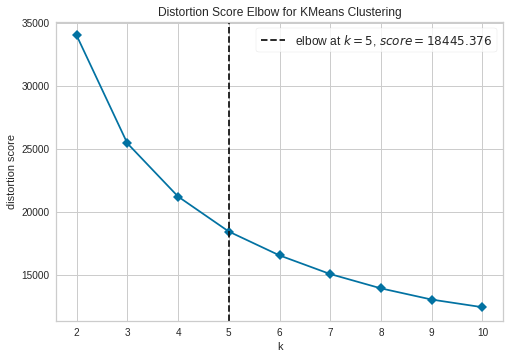

In [ ]:
plot_model(kmeans, plot = 'elbow')

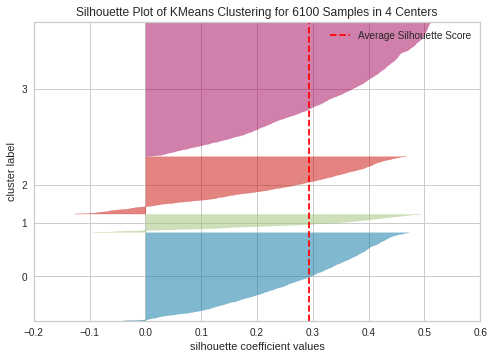

In [ ]:
plot_model(kmeans, plot = 'silhouette')

## https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

# **Interpret results and plan for actions**

In [ ]:
kmeans_df = assign_model(kmeans)
kmeans_df


,CUST_CODE,TotalSpend,TotalVisits,TotalSKUs,TotalSKUs_10,TotalSKUs_20,TotalSKUs_30,TotalSKUs_40,FirstDate,LastDate,TicketSize,total_days,recency,Cluster
0,CUST0000000181,2.44,1,1,1,1,1,1,2007-01-06,2007-01-06,2.440000,1,547,Cluster 3
1,CUST0000000369,959.33,220,189,81,36,15,5,2006-04-16,2008-07-05,4.360591,812,1,Cluster 1
2,CUST0000000689,328.57,16,116,73,41,19,5,2007-07-22,2008-06-23,20.535625,338,13,Cluster 2
3,CUST0000000998,5.95,3,4,4,4,4,2,2006-05-04,2006-07-07,1.983333,65,730,Cluster 3
4,CUST0000001163,39.74,4,24,21,15,10,4,2006-10-22,2008-06-22,9.935000,610,14,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6095,CUST0000999593,453.58,30,206,91,50,22,7,2006-05-06,2008-04-02,15.119333,698,95,Cluster 2
6096,CUST0000999645,105.11,11,46,36,27,15,6,2006-04-30,2008-05-08,9.555455,740,59,Cluster 2
6097,CUST0000999654,5.86,1,4,4,4,4,3,2006-06-25,2006-06-25,5.860000,1,742,Cluster 3
6098,CUST0000999935,444.17,21,127,66,40,18,6,2006-11-29,2008-06-05,21.150952,555,31,Cluster 2


In [ ]:
final_df= kmeans_df.drop(columns=['CUST_CODE','FirstDate','LastDate'])
member_df = final_df[['Cluster']]
member_df['member_count'] = 1
member_df = member_df.groupby(by=['Cluster']).agg('sum').reset_index()
final_df = final_df.groupby(by=['Cluster']).agg('mean').reset_index()
final_df = final_df.merge(member_df,how='left',on='Cluster')
import seaborn as sns
pink = sns.light_palette('pink', as_cmap = True)
s = final_df.style.background_gradient(cmap=pink)
s

,Cluster,TotalSpend,TotalVisits,TotalSKUs,TotalSKUs_10,TotalSKUs_20,TotalSKUs_30,TotalSKUs_40,TicketSize,total_days,recency,member_count
0,Cluster 0,39.472479,7.125345,14.867477,11.889564,9.276091,6.448371,3.321922,7.262952,490.262286,88.170072,1811
1,Cluster 1,2500.713525,173.713115,369.357923,120.882514,53.551913,22.303279,6.382514,17.923974,792.765027,5.426230,366
2,Cluster 2,412.896452,35.329372,107.172326,59.922750,34.348896,17.344652,5.510187,19.336443,643.820883,54.924448,1178
3,Cluster 3,10.089566,1.485246,5.165027,4.544262,3.875410,3.026594,2.034608,6.980277,31.483060,457.691803,2745


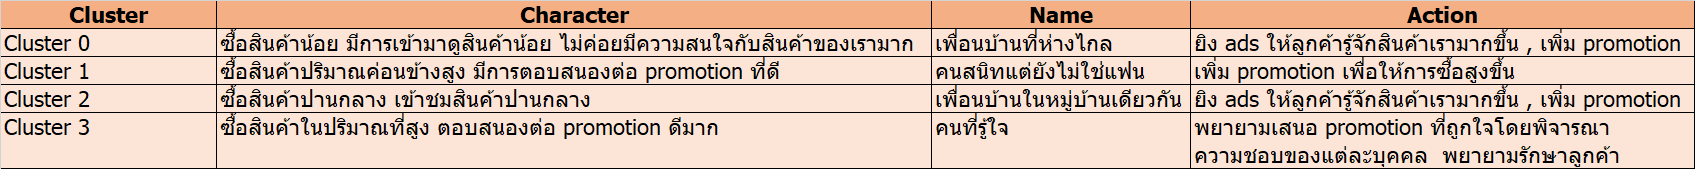